In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
    
tr = pd.read_csv("C:/MiniLynx/VvIT_2sem/Lab_3/train.csv", index_col="PassengerId")

tr.isnull().sum() #Кол-во пустых ячеек в каждом столбце.

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [23]:
med = tr['Age'].median()
tr['Age'] = tr['Age'].fillna(value = med) #Заполним пустые ячейки возраста медианным значением.

emb = tr['Embarked'].value_counts().idxmax()
tr['Embarked'] = tr['Embarked'].fillna(value = emb) #Заполним пустые ячейки самым популярным портом.

tr.Cabin = tr.Cabin.fillna('NAN') #Заполним пустые ячейки особым классом.

tr1 = tr.copy() #Создаём копию исходного массива.
tr1['Sex'].replace(['male', 'female'],[0, 1], inplace=True) #Заменяем значения в столбце Sex на числовые.

tr.isnull().sum() #Проверяем изменения кол-ва пустых ячеек в каждом столбце.

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [26]:
tr.dtypes.value_counts() #Выводим кол-во строк для каждого типа данных.

object     5
int64      4
float64    2
Name: count, dtype: int64

In [36]:
#tr['Age'].mean() #Среднее значение Age.
#tr['Age'].std( ) #Стандартное отклонение Age.
#tmin = tr.sort_values(by='Age', ascending=True) #Сортировка по возрастанию.
#tmin = tmin['Age'].iloc[0] #Минимальное значение Age.
#tmax = tr.sort_values(by='Age', ascending=False) #Сортировка по убыванию.
#tmax = tmax['Age'].iloc[0] #Максимальное значение Age.

tr1.describe() #Основные стат. характеристики числовых признаков.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
tr1.nunique () #Кол-во уникальных значений для каждого признака.

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       148
Embarked      3
dtype: int64

In [60]:
tr[['Sex', 'Survived']].value_counts() #Кол-во уникальных значений сочетания столбцов Sex и Survived.

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
Name: count, dtype: int64

(0.0, 549.0)

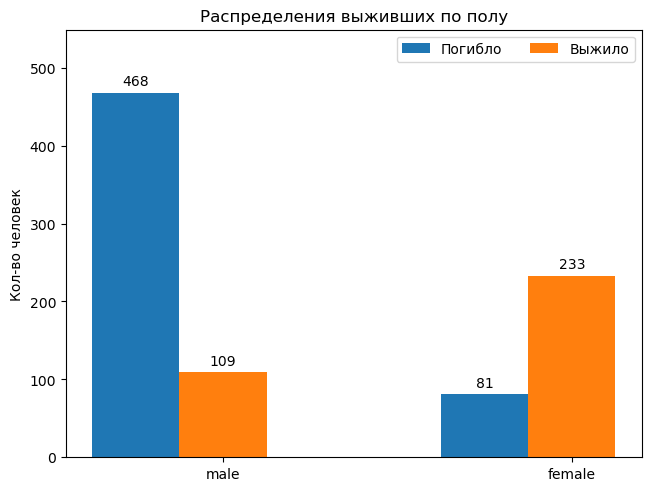

In [65]:
sex = np.array(tr['Sex'].value_counts()) #Делаем массив NumPy из кол-ва мужчин и женщин.
s = ('male', 'female')

m0, f1, m1, f0 = tr[['Sex', 'Survived']].value_counts() #Записываем полученные ранее значения в 4 переменные.
#Формируем из них массив:
surv = {
    'Погибло': (m0, f0),
    'Выжило': (m1, f1),
}

#Задаём необходимые переменные для параметров графика:
x = np.arange(len(sex))
multiplier = 0
fig, ax = mpl.subplots(layout='constrained')

#Создаём несколько графиков, накладывающихся один на другой:
for atr, meas in surv.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, meas, width = 0.25, label=atr)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Кол-во человек')
ax.set_title('Распределения выживших по полу')
ax.set_xticks(x + width, s)
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(0, m0 + f0)

Text(0.5, 1.0, 'female')

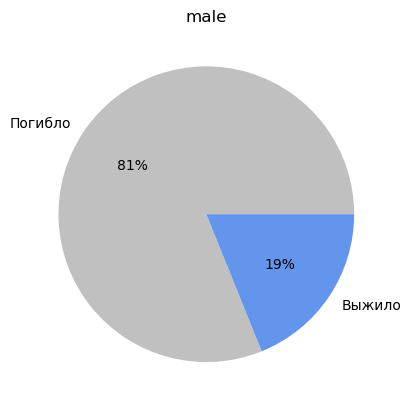

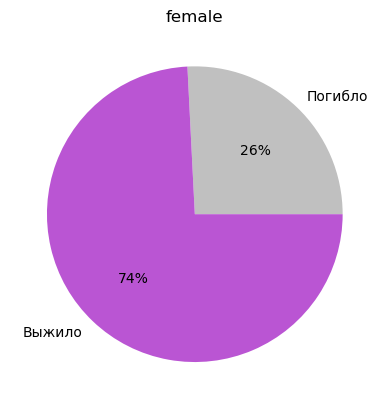

In [91]:
#Мужчины.
mpl.figure(0)
m = (tr['Sex'] == 'male').sum()
m1 = len(tr.loc[((tr['Sex'] == 'male') & (tr['Survived'] == 1))])
m0 = m - m1

mpl.pie([m0, m1], labels=["Погибло", 'Выжило'], autopct='%1.0f%%', colors=('silver', 'cornflowerblue'))
mpl.title('male')

#Женщины.
mpl.figure(1)
f = (tr['Sex'] == 'female').sum() 
f1 = len(tr.loc[((tr['Sex'] == 'female') & (tr['Survived'] == 1))])
f0 = f - f1

mpl.pie([f0, f1], labels=["Погибло", 'Выжило'], autopct='%1.0f%%', colors=('silver', 'mediumorchid'))
mpl.title('female')

<Axes: xlabel='Age', ylabel='Fare'>

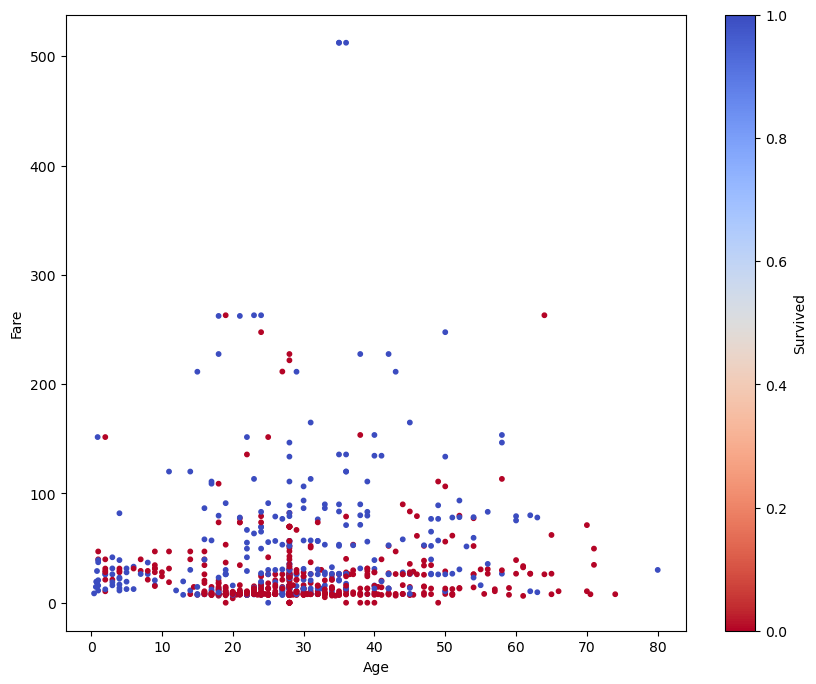

In [62]:
tr.plot.scatter (x="Age", y ='Fare', s=10, c='Survived', cmap='coolwarm_r', figsize=(10,8))